In [ ]:
import numpy as np  #importing numpy for numpy_array
import pandas as pd  #Importing Pandas for reading CSV files
import matplotlib.pyplot as plt  #importing matplotlib for plotting graphs 
import seaborn as sns  #importing seaborn for plotting heatmap
from sklearn.model_selection import train_test_split  #importing sklearn for regression method
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,export_text,export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix
!pip install mlxtend --upgrade --no-deps
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


# This is our World Map

In [ ]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
data = [ dict(
        type = 'choropleth',
        locations = ['India'],
        z = 24.66,
        locationmode = 'country names',
        text = ['India'],
        marker = dict(
            line = dict(color = 'rgb(20,20,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

  
layout = dict(
    title = 'World Map',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 20.5937,
                    lat = 78.9629),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')


## Climate change includes both global warming driven by human-induced emissions of greenhouse gases and the resulting large-scale shifts in weather patterns. Though there have been previous periods of climatic change, since the mid-20th century humans have had an unprecedented impact on Earth's climate system and caused change on a global scale.

## We are mining the data to see the pattern between **Canada** and **India** of how **climate change** has evolved before **COVID** and after **COVID**

## Data Source: https://climateknowledgeportal.worldbank.org/

In [ ]:
canada_df = pd.read_csv('tas_1991_2020_CAN.csv')


# Canada Dataset

In [ ]:
canada_df.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-26.2,1991,Jan Average,Canada,CAN
1,-21.0,1991,Feb Average,Canada,CAN
2,-18.2,1991,Mar Average,Canada,CAN
3,-8.6,1991,Apr Average,Canada,CAN
4,0.8,1991,May Average,Canada,CAN


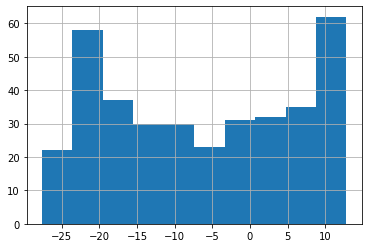

In [ ]:
canada_df['Temperature - (Celsius)'].hist()

In [ ]:
canada_df.describe()

,Temperature - (Celsius),Year
count,360.000000,360.000000
mean,-6.360556,2005.500000
std,12.576983,8.667488
min,-27.600000,1991.000000
25%,-18.700000,1998.000000
50%,-5.800000,2005.500000
75%,5.800000,2013.000000
max,12.800000,2020.000000


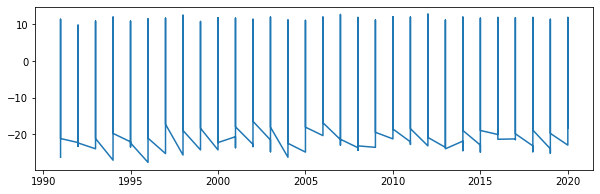

In [ ]:
fig = plt.figure(figsize = (10, 3))
plt.plot(canada_df[' Year'], canada_df['Temperature - (Celsius)'])
plt.show()

Text(0, 0.5, 'Val')

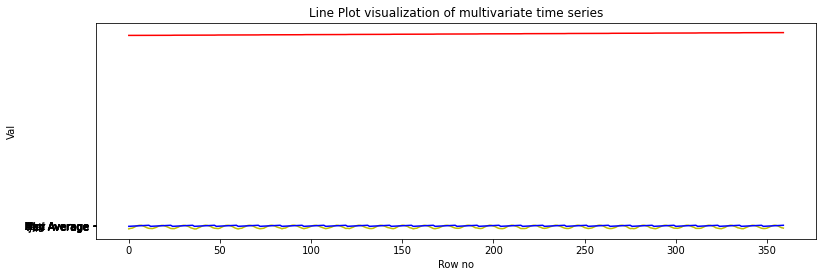

In [ ]:
fig = plt.figure(figsize = (10, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(canada_df['Temperature - (Celsius)'], data = canada_df, color = 'y')
axes.plot(canada_df[' Year'], data = canada_df, color = 'r')
axes.plot(canada_df[' Statistics'], data = canada_df, color = 'b')
axes.set_title('Line Plot visualization of multivariate time series')
axes.set_xlabel('Row no')
axes.set_ylabel('Val')

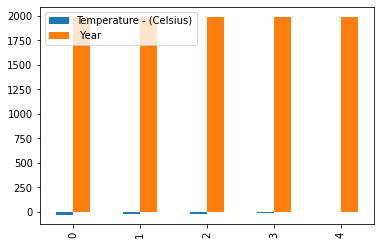

In [ ]:
canada_df.head().plot.bar()

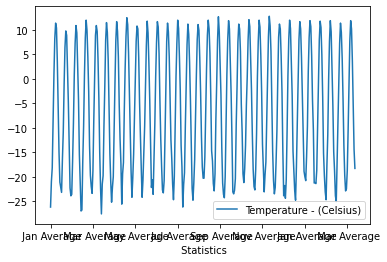

In [ ]:
canada_df.plot(x=' Statistics',y='Temperature - (Celsius)')

# BEFORE COVID

In [ ]:
canada_df[' Year'] = canada_df[' Year'].astype(int)

In [ ]:
newdf = canada_df[canada_df[' Year']== 2019]
newdf

,Temperature - (Celsius),Year,Statistics,Country,ISO3
336,-23.9,2019,Jan Average,Canada,CAN
337,-25.1,2019,Feb Average,Canada,CAN
338,-17.1,2019,Mar Average,Canada,CAN
339,-9.6,2019,Apr Average,Canada,CAN
340,-0.2,2019,May Average,Canada,CAN
341,7.3,2019,Jun Average,Canada,CAN
342,11.4,2019,Jul Average,Canada,CAN
343,9.5,2019,Aug Average,Canada,CAN
344,4.2,2019,Sep Average,Canada,CAN
345,-4.1,2019,Oct Average,Canada,CAN


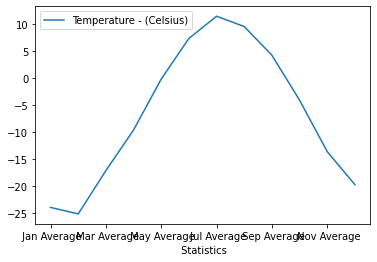

In [ ]:
newdf.plot(x=' Statistics',y='Temperature - (Celsius)')

# AFTER COVID

In [ ]:
newcovidf = canada_df[canada_df[' Year']== 2020]
newcovidf

,Temperature - (Celsius),Year,Statistics,Country,ISO3
348,-22.9,2020,Jan Average,Canada,CAN
349,-22.5,2020,Feb Average,Canada,CAN
350,-18.7,2020,Mar Average,Canada,CAN
351,-10.5,2020,Apr Average,Canada,CAN
352,-0.8,2020,May Average,Canada,CAN
353,7.7,2020,Jun Average,Canada,CAN
354,11.9,2020,Jul Average,Canada,CAN
355,10.2,2020,Aug Average,Canada,CAN
356,3.7,2020,Sep Average,Canada,CAN
357,-5.4,2020,Oct Average,Canada,CAN


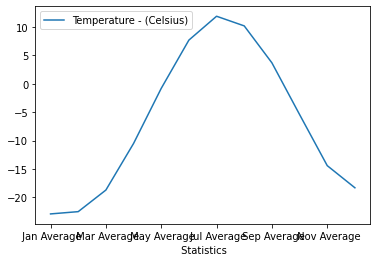

In [ ]:
newcovidf.plot(x=' Statistics',y='Temperature - (Celsius)')

#  India Dataset

In [ ]:
india_df = pd.read_csv('tas_1991_2020_IND.csv')
india_df

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,16.8,1991,Jan Average,India,IND
1,20.1,1991,Feb Average,India,IND
2,24.3,1991,Mar Average,India,IND
3,27.5,1991,Apr Average,India,IND
4,30.2,1991,May Average,India,IND
...,...,...,...,...,...
355,27.0,2020,Aug Average,India,IND
356,27.3,2020,Sep Average,India,IND
357,25.9,2020,Oct Average,India,IND
358,21.4,2020,Nov Average,India,IND


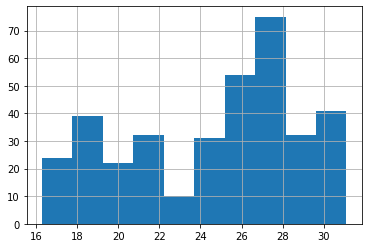

In [ ]:
india_df['Temperature - (Celsius)'].hist()

In [ ]:
india_df.describe()

,Temperature - (Celsius),Year
count,360.000000,360.000000
mean,24.681667,2005.500000
std,4.182854,8.667488
min,16.300000,1991.000000
25%,21.100000,1998.000000
50%,26.050000,2005.500000
75%,27.600000,2013.000000
max,31.100000,2020.000000


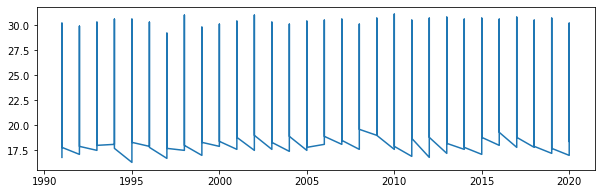

In [ ]:
fig = plt.figure(figsize = (10, 3))
plt.plot(india_df[' Year'], india_df['Temperature - (Celsius)'])
plt.show()

Text(0, 0.5, 'Val')

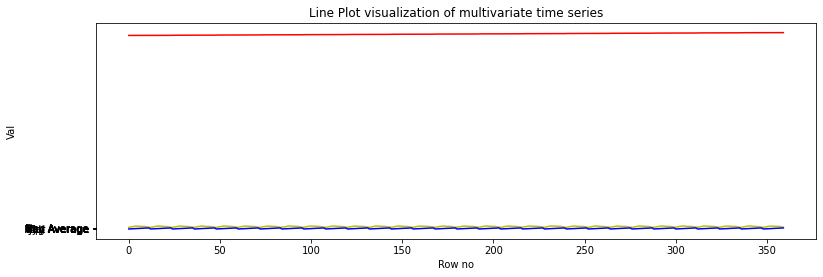

In [ ]:
fig = plt.figure(figsize = (10, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(india_df['Temperature - (Celsius)'], data = india_df, color = 'y')
axes.plot(india_df[' Year'], data = india_df, color = 'r')
axes.plot(india_df[' Statistics'], data = india_df, color = 'b')
axes.set_title('Line Plot visualization of multivariate time series')
axes.set_xlabel('Row no')
axes.set_ylabel('Val')

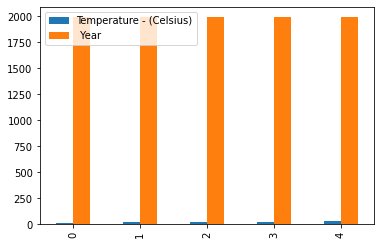

In [ ]:
india_df.head().plot.bar()

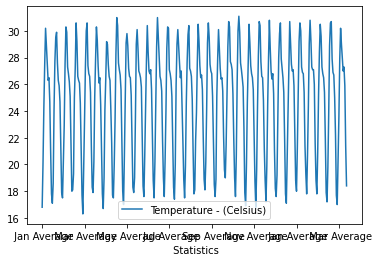

In [ ]:
india_df.plot(x=' Statistics',y='Temperature - (Celsius)')

# BEFORE COVID

In [ ]:
india_df[' Year'] = india_df[' Year'].astype(int)

In [ ]:
newinddf = india_df[india_df[' Year']== 2019]
newinddf

,Temperature - (Celsius),Year,Statistics,Country,ISO3
336,17.2,2019,Jan Average,India,IND
337,19.8,2019,Feb Average,India,IND
338,23.9,2019,Mar Average,India,IND
339,28.9,2019,Apr Average,India,IND
340,30.6,2019,May Average,India,IND
341,30.7,2019,Jun Average,India,IND
342,27.9,2019,Jul Average,India,IND
343,26.9,2019,Aug Average,India,IND
344,26.7,2019,Sep Average,India,IND
345,25.0,2019,Oct Average,India,IND


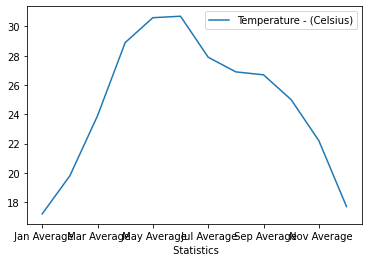

In [ ]:
newinddf.plot(x=' Statistics',y='Temperature - (Celsius)')

# AFTER COVID

In [ ]:
newincovidf = india_df[india_df[' Year']== 2020]
newincovidf

,Temperature - (Celsius),Year,Statistics,Country,ISO3
348,17.0,2020,Jan Average,India,IND
349,20.1,2020,Feb Average,India,IND
350,23.6,2020,Mar Average,India,IND
351,27.9,2020,Apr Average,India,IND
352,30.2,2020,May Average,India,IND
353,29.0,2020,Jun Average,India,IND
354,28.0,2020,Jul Average,India,IND
355,27.0,2020,Aug Average,India,IND
356,27.3,2020,Sep Average,India,IND
357,25.9,2020,Oct Average,India,IND


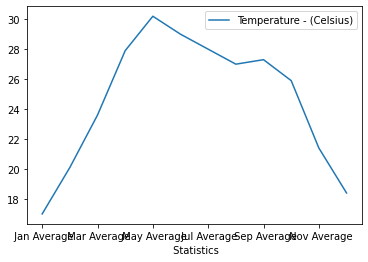

In [ ]:
newincovidf.plot(x=' Statistics',y='Temperature - (Celsius)')